In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%config Inlinebackend.figure_format = 'retina'
#더 높은 해상도로 출력한다.


In [2]:
#데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
# 타겟은 Column 11 is a quantitative measure of disease progression
# one year after baseline 으로 되어있음 csv 파일임
# 11번째 칼럼
diabetes.target_filename

'diabetes_target.csv.gz'

In [6]:
#diabetes 총데이터와 크기 행렬 모양
diabetes_data = diabetes.data
print(diabetes_data.shape)

(442, 10)


In [7]:
#feature name 확인
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
#diabetes의 data를 df_X 에 저장
df_X = diabetes.data

In [9]:
#target 값을 df_y에 저장
df_y = diabetes.target

In [10]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [11]:
X = np.array(df_X)
y = np.array(df_y)

print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [12]:
# train 데이터와 test 데이터로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# w 값과 b 값 준비 (feature 10개)
W = np.random.rand(10)
b = np.random.rand()

In [14]:
W

array([0.61454733, 0.39633425, 0.3208679 , 0.48088137, 0.72316465,
       0.56111769, 0.87073282, 0.1669768 , 0.94084334, 0.12680782])

In [15]:
b

0.8284374752542393

In [16]:
# model 함수 구현

def model(X, W, b):
    predictions = 0
    for i in range(11): ### 10으로 했어야 됬는데 11으로 했는데 왜에러가 나지 않았을까?
        predictions += X[:,i]*W[i] #X[:,i] X의 모든 행에 대헤서 i번째 열의 정보를 가져다달라
        predictions += b
        return predictions

In [17]:
#손실함수 MSE 사용
def MSE(a,b):
    mse =((a-b)**2).mean() 
    # .mean 뒤에 괄호를 해줘야한대 인스턴스 객체로 number 나오게
    # .mean() 이렇게 아니면 mean 함수로됨
    return mse

In [18]:
# 손실함수 정의
def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

In [19]:
# gradient 함수 구현
#직접 미분을 해서 경사하강법을 이용한 최소의 손실함수 값을 확인 위해

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산 (손실함수를 w에 대하여 미분)
    dW = 1/N * 2 * X.T.dot(y_pred - y) # .T transpose, .dot 행렬곱
        
    # b의 gradient 계산 (손실함수를 b에 대하여 미분)
    db = 2 * (y_pred - y).mean() 
    return dW, db

In [20]:
# 한번 경사 계산해봄

dW, db = gradient(X, W, b, y) # W와 b는 앞에서 랜덤으로 주어줌
print("dW:", dW)
print("db:", db)

dW: [ -60.71370544  -13.9217172  -189.86430342 -142.90710162  -68.61892644
  -56.32997161  127.81981541 -139.35155204 -183.19446353 -123.80747854]
db: -302.6100933752834


In [21]:
# 반복하여 가중치 업데이트를 하며 학습
#학습률 0,0001 설정 (하이퍼 파라미터)

LEARNING_RATE = 0.001

In [22]:
#학습 1000번
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21730.7592
Iteration 200 : Loss 16552.5317
Iteration 300 : Loss 13081.0370
Iteration 400 : Loss 10753.1623
Iteration 500 : Loss 9191.6034
Iteration 600 : Loss 8143.5531
Iteration 700 : Loss 7439.6216
Iteration 800 : Loss 6966.3108
Iteration 900 : Loss 6647.5723
Iteration 1000 : Loss 6432.4496


In [23]:
#loss값 아직도 너무큼 
#학습률 10배 상향 조정, 0.01
#X특성 컬럼을 빼면 학습속도가 빨라질수 있고, 
#loss 값이 훨씬 더 낮아질수 있음
#칼럼을 하나씩 제거해보면서 feature와 target상관 관계 확인 할 수는 있음
#상관 관계가 없어보이는 칼럼을 제거하여
#정확도와 학습 효율을 높일수 있으나
#각 특성들이 중요한 임상특성이므로 빼지않고 진행
#iteration 수 늘림
# 기존 losses data에 이어서 학습진행

LEARNING_RATE = 0.01

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5970.5192
Iteration 200 : Loss 5931.4978
Iteration 300 : Loss 5907.9773
Iteration 400 : Loss 5890.6896
Iteration 500 : Loss 5877.9159
Iteration 600 : Loss 5868.4763
Iteration 700 : Loss 5861.5007
Iteration 800 : Loss 5856.3458
Iteration 900 : Loss 5852.5365
Iteration 1000 : Loss 5849.7214
Iteration 1100 : Loss 5847.6411
Iteration 1200 : Loss 5846.1038
Iteration 1300 : Loss 5844.9678
Iteration 1400 : Loss 5844.1283
Iteration 1500 : Loss 5843.5079
Iteration 1600 : Loss 5843.0495
Iteration 1700 : Loss 5842.7107
Iteration 1800 : Loss 5842.4603
Iteration 1900 : Loss 5842.2753
Iteration 2000 : Loss 5842.1386


In [24]:
# 재시행
# learning_rate 0.1, iter +2000

LEARNING_RATE = 0.1

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5841.7699
Iteration 200 : Loss 5841.7524
Iteration 300 : Loss 5841.7515
Iteration 400 : Loss 5841.7515
Iteration 500 : Loss 5841.7515
Iteration 600 : Loss 5841.7515
Iteration 700 : Loss 5841.7515
Iteration 800 : Loss 5841.7515
Iteration 900 : Loss 5841.7515
Iteration 1000 : Loss 5841.7515
Iteration 1100 : Loss 5841.7515
Iteration 1200 : Loss 5841.7515
Iteration 1300 : Loss 5841.7515
Iteration 1400 : Loss 5841.7515
Iteration 1500 : Loss 5841.7515
Iteration 1600 : Loss 5841.7515
Iteration 1700 : Loss 5841.7515
Iteration 1800 : Loss 5841.7515
Iteration 1900 : Loss 5841.7515
Iteration 2000 : Loss 5841.7515


In [25]:
# Loss 5841.7515로 수렴

In [26]:
# test data에 대한 성능 확인
# X_test 와 y_test 데이터에 대해서 예측

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

5254.231976236004

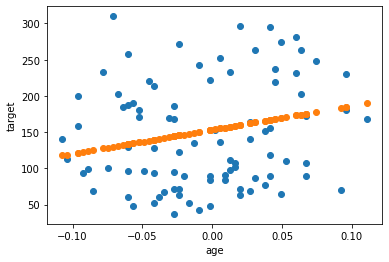

In [27]:
#모델이 예측한 데이터 시각화
# 모델이 얼마나 잘예측하는지 정답과 비교 prediction y_test
# 첫번열째 데이터인 age에대해 tips X_test[:,0]
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.xlabel('age')
plt.ylabel('target') 
#target(a quantitative measure of disease progression one year after baseline)
plt.show()

#age와 target 간에는 상관관계가 거의 없고 불규칙해 보인다 


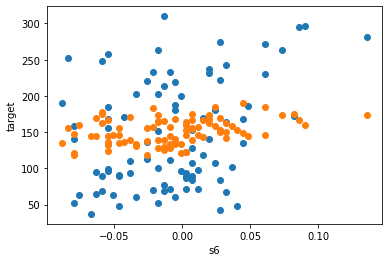

In [28]:
#임상적으로 가장 경향성이 높을 것으로 예상되는
#s6 (glu, blood sugar level) 와 plot 해봄
plt.scatter(X_test[:,9], y_test)
plt.scatter(X_test[:,9], prediction)
plt.xlabel('s6')
plt.ylabel('target') 
plt.show()

In [29]:
# 결론
# 모집단 442명의 diabetes환자의 
# baseline 대비 1 year progression 결과,
# 초기 blood sugar level에 비하여 잘 조절 될 것으로 모델은 예상하였으나
# 실제 progression 은 불규칙한 경우가 많아 예측이 어려웠다.
# age에 관련해서도 모델은 약한 우상향으로 수치가 높아질것으로 예상하였다.
# 하지만 실제 age 에 관련한 target 값에서도 불규칙해보이는 결과값을 보였다.
# 그렇다면, 전체 플랏에 대한 예측값의 상관관계를 살펴보자

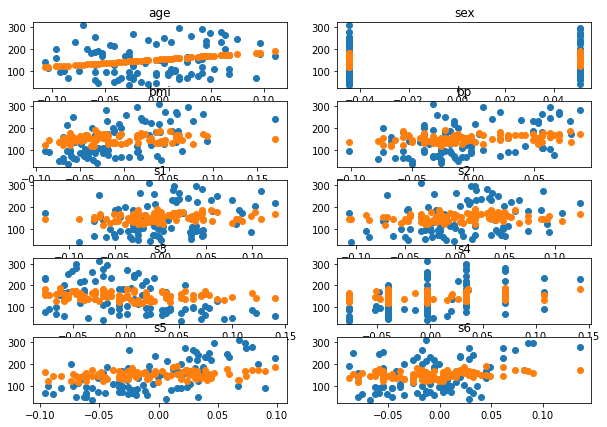

In [31]:

# 보기 편하게 그래프 title에 feature_name만 표기(x축의 요소)
# y 값은 target 

plt.figure(figsize=(10, 7))  #사이즈 확대 그래프간 간격 조절하려면 어떻게 해야할까? 위아래겹침
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title(diabetes.feature_names[i])
    plt.scatter(X_test[:,i], y_test)
    plt.scatter(X_test[:,i], prediction)
    
plt.show()

# data 자체가 feature에 큰 상관관계를 보이는 것 같지 않다
# bmi, bp,s5,s6 에 대해서는 약한 양의 상관관계를 보이고
# s3에 대해서는 약한 음의 상관관계를 보이는것 같다.
# age와 sex는 전혀 상관이 없어 보인다.
# (이미 모델 학습을 진행하면서 위 두 feature에 가중치를
# 0에 가깝게 줬을것 으로 생각되지만)
# plot만 보았을때 2차원 시각적으로는 age와 sex는 전혀 상관이 없어 보이지만,
# age와 sex가 다른 feature 와 interaction 하여 target 값에 영향을 줄 수 있다.
# (현재 dataset 뿐아니라 추후 feature를 업데이트 하였을때도 가능성이 있다.)